In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif as fs
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
bank_data=pd.read_csv('bankchurn.csv')

In [3]:
bank_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
new_bank_data=bank_data.copy()

In [5]:
new_bank_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
bank_data['Geography'].value_counts()

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64

In [7]:
bank_data['Geography'].replace(['GERMANY','gernamy','germany','ger'],'Germany',inplace=True)

In [8]:
bank_data['Geography'].replace(['spain','espanio'],'Spain',inplace=True)

In [9]:
bank_data['Geography'].replace(['fra','france'],'France',inplace=True)

In [10]:
bank_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
bank_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

### EDA

In [12]:
# Country Count

In [13]:
country_count=bank_data.groupby('Geography')['Geography'].count()
country_count

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

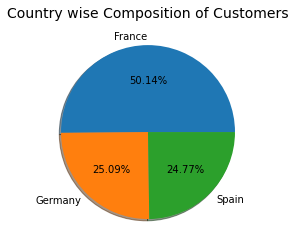

In [14]:
plt.pie(country_count,labels=country_count.index,autopct='%0.2f%%',shadow=True)
plt.title('Country wise Composition of Customers',fontsize=14)
plt.show()

In [15]:
# Gender Count

In [16]:
gen_count=bank_data.groupby('Gender')['Gender'].count()
gen_count

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

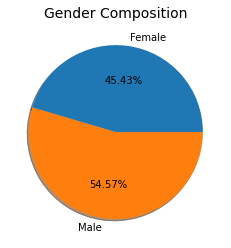

In [17]:
plt.pie(gen_count,labels=gen_count.index,autopct='%0.2f%%',shadow=True)
plt.title('Gender Composition',fontsize=14)
plt.show()

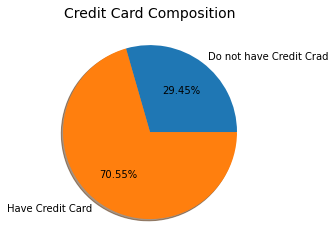

In [18]:
cred_count=bank_data.groupby('HasCrCard')['HasCrCard'].count()
plt.pie(cred_count,labels=['Do not have Credit Crad','Have Credit Card'],autopct='%0.2f%%',shadow=True)
plt.title('Credit Card Composition',fontsize=14)
plt.show()

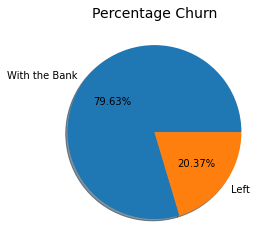

In [19]:
churn_count=bank_data.groupby('Exited')['Exited'].count()
plt.pie(churn_count,labels=['With the Bank','Left'],autopct='%0.2f%%',shadow=True)
plt.title('Percentage Churn',fontsize=14)
plt.show()

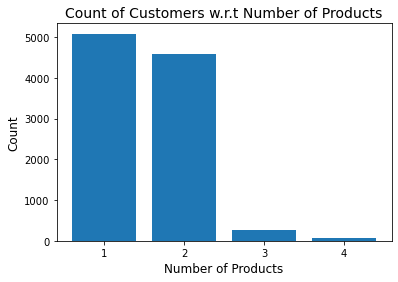

In [20]:
prod_count=bank_data.groupby('NumOfProducts')['NumOfProducts'].count()
plt.bar(x=prod_count.index,height=prod_count.values)
plt.xticks([1,2,3,4],['1','2','3','4'])
plt.title('Count of Customers w.r.t Number of Products',fontsize=14)
plt.xlabel('Number of Products',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

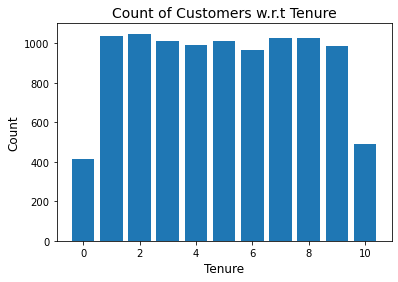

In [21]:
tenure_count=bank_data.groupby('Tenure')['Tenure'].count()
plt.bar(x=tenure_count.index,height=tenure_count.values)

plt.title('Count of Customers w.r.t Tenure',fontsize=14)
plt.xlabel('Tenure',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

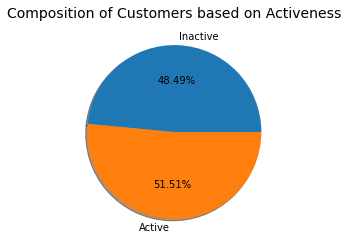

In [22]:
act_count=bank_data.groupby('IsActiveMember')['IsActiveMember'].count()
plt.pie(act_count,labels=['Inactive','Active'],autopct='%0.2f%%',shadow=True)
plt.title('Composition of Customers based on Activeness',fontsize=14)
plt.show()

In [23]:
# Continous features

In [24]:
features=['Age','EstimatedSalary','Balance','CreditScore']

In [25]:
def dist_plot(feature):
    sns.histplot(data=bank_data,x=feature,kde=True)
    plt.title(feature+' '+'Distribution')
    plt.show()

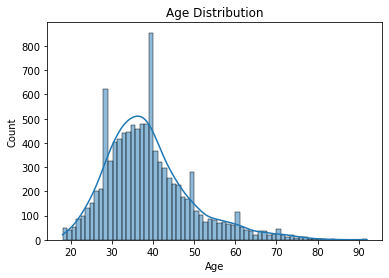

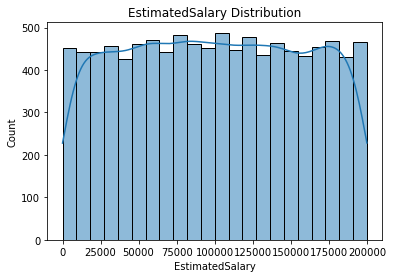

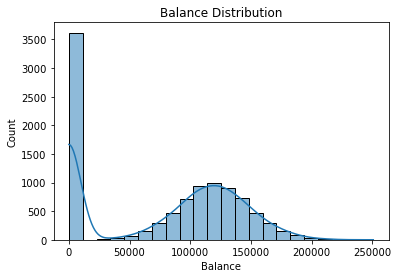

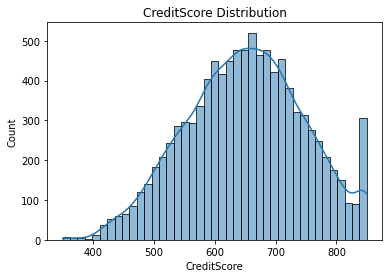

In [26]:
for col in features:
    dist_plot(col)

In [27]:
# Bivariate Analysis

In [28]:
# Active/Inactive Members v/s Exited

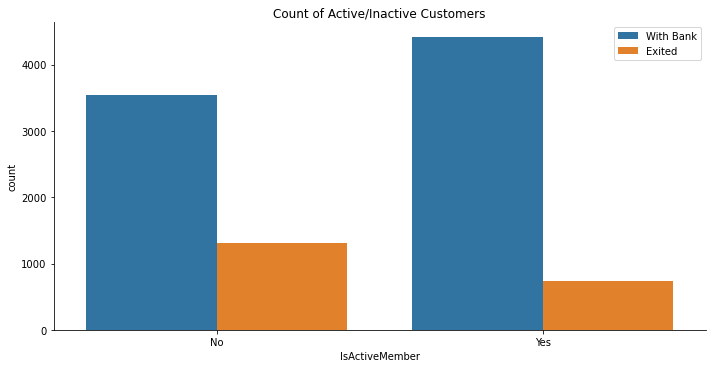

In [29]:
sns.catplot(data=bank_data,x='IsActiveMember',hue='Exited',kind='count',legend=False,aspect=2)
plt.xticks([0,1],['No','Yes'])
plt.legend(['With Bank','Exited'])
plt.title('Count of Active/Inactive Customers')
plt.show()

In [30]:
#Credit Card analysis

In [31]:
ct=pd.crosstab(index=bank_data['HasCrCard'],columns=bank_data['Exited'],margins=True)

In [32]:
ct['Churn_Rate']=round(((ct[1])/(ct['All']))*100,2)

In [33]:
ct.loc[0:1,:]

Exited,0,1,All,Churn_Rate
HasCrCard,,,,
0,2332,613,2945,20.81
1,5631,1424,7055,20.18


In [34]:
# Gender wise Churn

In [35]:
gen_ct=pd.crosstab(index=bank_data['Gender'],columns=bank_data['Exited'],margins=True)

In [36]:
gen_ct['Churn_Rate']=round(((gen_ct[1])/(gen_ct['All']))*100,2)

In [37]:
gen_df=gen_ct.iloc[0:2,:]
gen_df.reset_index(inplace=True)

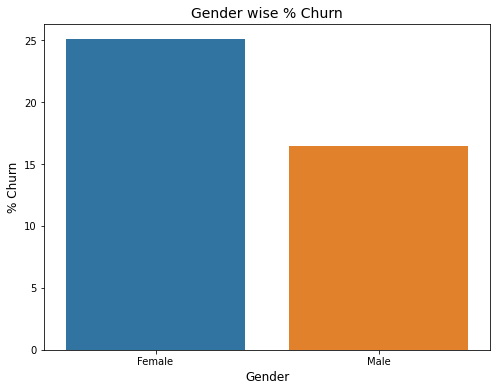

In [38]:
_,ax=plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=gen_df,x='Gender',y='Churn_Rate',ci=100)
plt.title('Gender wise % Churn',fontsize=14)
plt.ylabel('% Churn',fontsize=12)
plt.xlabel('Gender',fontsize=12)
plt.show()

In [39]:
# Country wise % Churn

In [40]:
count_ct=pd.crosstab(index=bank_data['Geography'],columns=bank_data['Exited'],margins=True)
count_ct['Churn_Rate']=round(((count_ct[1])/(count_ct['All']))*100,2)
count_ct=count_ct.iloc[0:3,:]
count_ct.reset_index(inplace=True)

In [41]:
count_ct

Exited,Geography,0,1,All,Churn_Rate
0,France,4204,810,5014,16.15
1,Germany,1695,814,2509,32.44
2,Spain,2064,413,2477,16.67


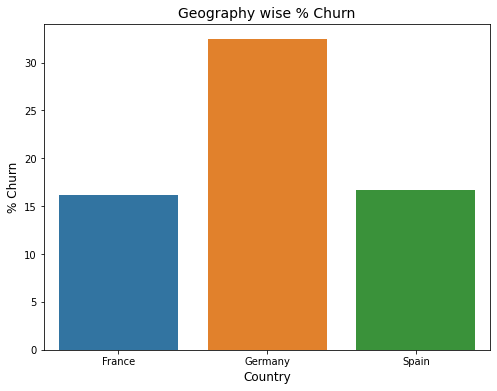

In [42]:
_,ax=plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=count_ct,x='Geography',y='Churn_Rate',ci=100)
plt.title('Geography wise % Churn',fontsize=14)
plt.ylabel('% Churn',fontsize=12)
plt.xlabel('Country',fontsize=12)
plt.show()

In [43]:
#Age/churn

In [44]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


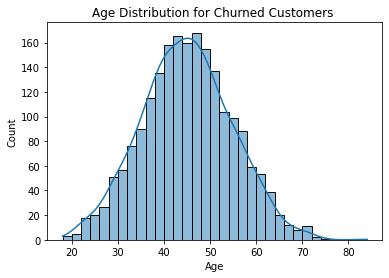

In [45]:
churn_df=bank_data[bank_data['Exited']==1]
sns.histplot(data=churn_df,x='Age',kde=True)
plt.title('Age Distribution for Churned Customers ')
plt.show()

In [46]:
#Salary v/s Churn

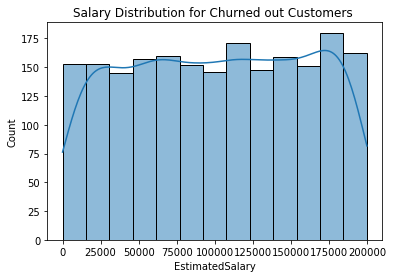

In [47]:
sns.histplot(data=churn_df,x='EstimatedSalary',kde=True)
plt.title('Salary Distribution for Churned out Customers ')
plt.show()

In [48]:
# Balance Churn

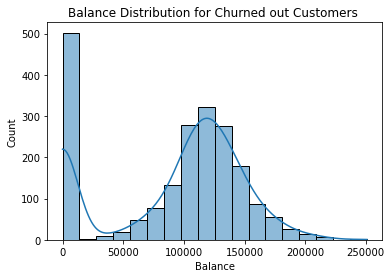

In [49]:
sns.histplot(data=churn_df,x='Balance',kde=True)
plt.title('Balance Distribution for Churned out Customers ')
plt.show()

In [50]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [51]:
#Churn w.r.t  

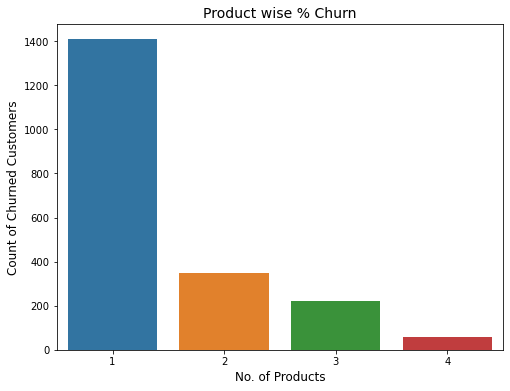

In [52]:
_,ax=plt.subplots(1,1,figsize=(8,6))
sns.countplot(data=churn_df,x='NumOfProducts')
plt.title('Product wise % Churn',fontsize=14)
plt.ylabel('Count of Churned Customers',fontsize=12)
plt.xlabel('No. of Products',fontsize=12)
plt.show()

In [53]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
bank_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Scaling

In [55]:

scaler=MinMaxScaler()
columns=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

for col in columns:
    bank_data[col]=scaler.fit_transform(np.array(bank_data[col]).reshape(-1,1))

In [56]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0


### Encoding

In [57]:

geo=pd.get_dummies(bank_data['Geography'],drop_first=True)
bank_data=pd.concat((bank_data,geo),axis=1)
bank_data.drop('Geography',axis=1,inplace=True)


In [58]:
gender=pd.get_dummies(bank_data['Gender'],drop_first=True)
bank_data=pd.concat((bank_data,gender),axis=1)
bank_data.drop('Gender',axis=1,inplace=True)

In [59]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1,0


### Feature Selection

In [60]:
X=bank_data.drop('Exited',axis=1)
Y=bank_data['Exited']

In [61]:
cols=list(bank_data.columns)
cols.pop(8)

'Exited'

In [62]:
fscore,p_value=fs(X,Y)

In [63]:
fs_df=pd.DataFrame({'Feature':cols,'f-score':fscore,'p_value':p_value})

In [64]:
fs_df.sort_values(by='f-score',ascending=False)

,Feature,f-score,p_value
1,Age,886.063275,1.239931e-186
8,Germany,310.258384,2.059537e-68
6,IsActiveMember,249.800794,1.348269e-55
3,Balance,142.473832,1.275563e-32
10,Male,114.727989,1.258505e-26
9,Spain,27.809468,1.366655e-07
4,NumOfProducts,22.915223,1.717333e-06
0,CreditScore,7.344522,6.738214e-03
2,Tenure,1.960164,1.615268e-01
7,EstimatedSalary,1.463262,2.264404e-01


### Splitting the Dataset

In [65]:
X1=bank_data[['Age','Germany','IsActiveMember','Balance','Male']]
Y1=bank_data['Exited']

x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3,random_state=42)

### Model Building

#### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix


In [67]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [68]:
# Training Performance
model1.score(x_train,y_train)

0.8108571428571428

In [69]:
#predicting the values
log_y_pred=model1.predict(x_test)

In [70]:
accuracy_score(y_test,log_y_pred)

0.816

In [71]:
f1_score(y_test,log_y_pred)

0.29591836734693877

### Tuning the Threshold values

In [72]:
thresholds=np.arange(0,1,0.1)
def threshold1():
    f1=[]
    for th in thresholds:
        y_pred=np.where(model1.predict_proba(x_test)[:,1]>th,1,0)
        f1.append(f1_score(y_test,y_pred))

    acc_df=pd.DataFrame(zip(thresholds,f1),columns=['Thresholds','F1-Score'])       
    return acc_df.sort_values('F1-Score',ascending=False).head(1)

In [73]:
threshold1()

,Thresholds,F1-Score
3,0.3,0.481155


In [74]:
 y_pred_actual1=np.where(model1.predict_proba(x_test)[:,1]>0.3,1,0)

In [75]:
#probabilities
y_prob=model1.predict_proba(x_test)[:,1]

In [76]:
log_recall=recall_score(y_test,y_pred_actual1)
log_recall

0.5136986301369864

In [77]:
log_f1=f1_score(y_test,y_pred_actual1)
print('The f1_score for Logistic Regression is:',log_f1)
log_recall=recall_score(y_test,y_pred_actual1)
print('The recall_score for  Logistic Regression is:',log_recall)

The f1_score for Logistic Regression is: 0.4811547714514836
The recall_score for  Logistic Regression is: 0.5136986301369864


In [78]:
matrix = confusion_matrix(y_test,y_pred_actual1)
print(matrix)


[[2053  363]
 [ 284  300]]


In [79]:
ct=pd.crosstab(index=y_test,columns=y_pred_actual1)

In [80]:
ct.reset_index(inplace=True)

In [81]:
ct

col_0,Exited,0,1
0,0,2053,363
1,1,284,300


In [82]:
ct=ct.loc[:,0:]

In [83]:
df=pd.DataFrame(ct.to_numpy(),columns=['Not Exited','Exited'],index=['Not Exited','Exited'])

In [84]:
df



,Not Exited,Exited
Not Exited,2053,363
Exited,284,300


In [85]:
comp_df=pd.DataFrame(zip(y_pred_actual1,y_test),columns=['Predicted','Actual'])

In [86]:
comp_df.head(25)

,Predicted,Actual
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,1
8,1,0
9,0,0


### Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [88]:
X2=bank_data.drop(['Exited'],axis=1)
Y2=bank_data['Exited']

x1_train,x1_test,y1_train,y1_test=train_test_split(X2,Y2,random_state=42,test_size=0.3,stratify=Y2)

In [89]:
dtm=DecisionTreeClassifier(max_depth=3)
dtm.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=3)

In [90]:
#Predictions
dtm_y_pred=dtm.predict(x1_test)

In [91]:
print('The Accuracy for train data is:',dtm.score(x1_train,y1_train))
print('The Accuracy for test data is:',accuracy_score(y1_test,dtm_y_pred))

The Accuracy for train data is: 0.8395714285714285
The Accuracy for test data is: 0.8406666666666667


In [92]:


max_depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for val in max_depth:
    kf =StratifiedKFold(n_splits=val, shuffle=True, random_state=100)
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 100), X2, Y2, cv=kf , scoring="recall")
    print(f'For max depth: {val} the recall  is:{round(np.mean(score),3)}')

For max depth: 2 the recall  is:0.277
For max depth: 3 the recall  is:0.322
For max depth: 4 the recall  is:0.35
For max depth: 5 the recall  is:0.416
For max depth: 6 the recall  is:0.445
For max depth: 7 the recall  is:0.468
For max depth: 8 the recall  is:0.467
For max depth: 9 the recall  is:0.46
For max depth: 10 the recall  is:0.469
For max depth: 11 the recall  is:0.476
For max depth: 12 the recall  is:0.479
For max depth: 13 the recall  is:0.488
For max depth: 14 the recall  is:0.49
For max depth: 15 the recall  is:0.486


In [93]:
dtm=DecisionTreeClassifier(max_depth= 14, random_state= 100)
dtm.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=14, random_state=100)

In [94]:
dtm_y_predict=dtm.predict(x1_test)

In [95]:
print('The f1 score of the Decision Tree Classifier after Cv is:',f1_score(y1_test,dtm_y_predict))

The f1 score of the Decision Tree Classifier after Cv is: 0.502608695652174


In [96]:
dtm_f1=f1_score(y1_test,dtm_y_predict)
print('The f1_score for Decision Tree classifier is:',dtm_f1)
dtm_recall=recall_score(y1_test,dtm_y_predict)
print('The recall_score for Decision Tree classifier is:',dtm_recall)

The f1_score for Decision Tree classifier is: 0.502608695652174
The recall_score for Decision Tree classifier is: 0.47299509001636664


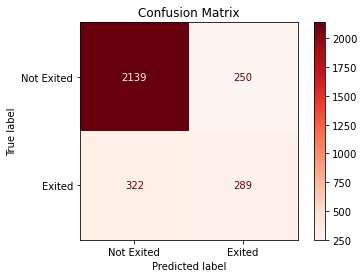

In [97]:
matrix = plot_confusion_matrix(dtm,x1_test,y1_test , display_labels=['Not Exited',"Exited"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

### GaussianNB

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
gau_model=GaussianNB()
gau_model.fit(x_train,y_train)

GaussianNB()

In [100]:
gau_y_pred=gau_model.predict(x_test)

In [101]:
print('The Accuracy for train data is:',gau_model.score(x_train,y_train))
print('The Accuracy for test data is:',accuracy_score(y_test,gau_y_pred))

The Accuracy for train data is: 0.8034285714285714
The Accuracy for test data is: 0.815


In [102]:
gnb_f1=f1_score(y_test,gau_y_pred)
print('The f1_score for GaussianNB is:',gnb_f1)
gnb_recall=recall_score(y_test,gau_y_pred)
print('The recall_score for GaussianNB is:',gnb_recall)

The f1_score for GaussianNB is: 0.3728813559322034
The recall_score for GaussianNB is: 0.2825342465753425


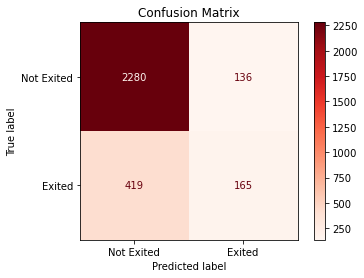

In [103]:
matrix = plot_confusion_matrix(gau_model,x_test,y_test , display_labels=['Not Exited',"Exited"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

### Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,oob_score=True)
rf_model.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [106]:
#Predicted
rf_pred=rf_model.predict(x1_test)

In [107]:
print('The Accuracy for train data is:',rf_model.score(x1_train,y1_train))
print('The Accuracy for test data is:',accuracy_score(y1_test,rf_pred))

The Accuracy for train data is: 0.8501428571428571
The Accuracy for test data is: 0.847


In [108]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [109]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [110]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [111]:
grid_search.fit(x1_train, y1_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [112]:
grid_search.best_score_

0.8581428571428572

In [113]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [114]:
rf=RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_jobs=-1,n_estimators=200,random_state=42)

In [115]:
rf.fit(x1_train,y1_train)
rf_y_pred=rf.predict(x1_test)

In [116]:
print('The Accuracy for test data is:',accuracy_score(y1_test,rf_y_pred))

The Accuracy for test data is: 0.8673333333333333


In [117]:
rf_f1=f1_score(y1_test,rf_y_pred)
print('The f1_score for RandomForest is:',rf_f1)
rf_recall=recall_score(y1_test,rf_y_pred)
print('The recall_score for RandomForest is:',rf_recall)

The f1_score for RandomForest is: 0.5888429752066116
The recall_score for RandomForest is: 0.4664484451718494


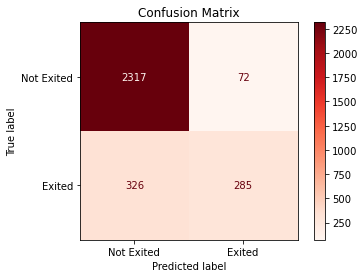

In [118]:
matrix = plot_confusion_matrix(rf,x1_test,y1_test , display_labels=['Not Exited',"Exited"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

### AdaBoost Classifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
ada_model=AdaBoostClassifier()
ada_model.fit(x1_train,y1_train)

AdaBoostClassifier()

In [121]:
#Predicted
ada_pred=ada_model.predict(x1_test)

In [122]:
print('The Accuracy for train data is:',ada_model.score(x1_train,y1_train))
print('The Accuracy for test data is:',accuracy_score(y1_test,ada_pred))

The Accuracy for train data is: 0.856
The Accuracy for test data is: 0.8636666666666667


In [123]:
#Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_model, X2, Y2, cv=cv,scoring='recall' )
ada_recall_cv=kf_cv_scores.mean()
print("K-fold CV average accuracy for test data: %.2f" % ada_recall_cv)

K-fold CV average accuracy for test data: 0.48


In [124]:
ada_f1=f1_score(y1_test,ada_pred)
print('The f1_score for Adaboost is:',ada_f1)
ada_recall=recall_score(y1_test,ada_pred)
print('The recall_score for Adaboost is:',ada_recall)

The f1_score for Adaboost is: 0.5954500494559842
The recall_score for Adaboost is: 0.49263502454991814


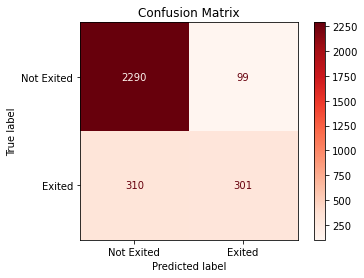

In [125]:
matrix = plot_confusion_matrix(ada_model,x1_test,y1_test , display_labels=['Not Exited',"Exited"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

### Stacking

In [126]:
from sklearn.ensemble import StackingClassifier

In [127]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('gnb', GaussianNB()))
    level0.append(('cart', DecisionTreeClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [128]:
stack_model=get_stacking()
stack_model.fit(x1_train,y1_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('gnb', GaussianNB()),
                               ('cart', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [129]:
#Training 
stack_train=stack_model.score(x1_train,y1_train)
print('The training performance of the Stacking model is:',stack_train)

The training performance of the Stacking model is: 0.8744285714285714


In [130]:
#Predictions
stack_pred=stack_model.predict(x1_test)

In [131]:
#Model Performance
stack_per=accuracy_score(y1_test,stack_pred)
print('The model performance of the Stacking model is:',stack_per)

The model performance of the Stacking model is: 0.8336666666666667


#### Cross Validation

In [132]:
# define the model
model = get_stacking()

# evaluate the model
cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
n_scores = cross_val_score(model, X1,Y1, scoring='recall', cv=cv)

# report performance
stack_recall_cv=np.mean(n_scores)
print('Recall-Score for Stacking:' ,stack_recall_cv)

Recall-Score for Stacking: 0.26118999323867476


In [133]:
stack_f1=f1_score(y1_test,stack_pred)
print('The f1_score for Stacking is:',stack_f1)
stack_recall=recall_score(y1_test,stack_pred)
print('The recall_score for Stacking is:',stack_recall)

The f1_score for Stacking is: 0.44617092119866814
The recall_score for Stacking is: 0.32896890343698854


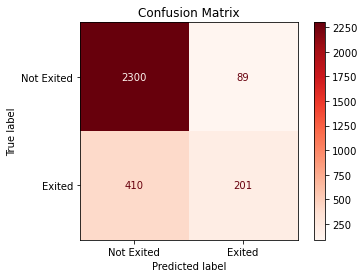

In [134]:
matrix = plot_confusion_matrix(stack_model,x1_test,y1_test , display_labels=['Not Exited',"Exited"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

### Model Comparison

In [135]:
mod=['Logistic Regression','Gaussian Naive Bayes','Decision Tree','Random Forest','Adaboost','Stacking']
f1_scores=[log_f1,gnb_f1,dtm_f1,rf_f1,ada_f1,stack_f1]
recall_scores=[log_recall,gnb_recall,dtm_recall,rf_recall,ada_recall,stack_recall]
f1_df=pd.DataFrame(zip(mod,f1_scores,recall_scores),columns=['Models','F1_Score','Recall_Scores'])
f1_df['F1_Score']=round(f1_df['F1_Score']*100,2)
f1_df['Recall_Scores']=round(f1_df['Recall_Scores']*100,2)

In [136]:
f1_df

,Models,F1_Score,Recall_Scores
0,Logistic Regression,48.12,51.37
1,Gaussian Naive Bayes,37.29,28.25
2,Decision Tree,50.26,47.30
3,Random Forest,58.88,46.64
4,Adaboost,59.55,49.26
5,Stacking,44.62,32.90


<BarContainer object of 6 artists>

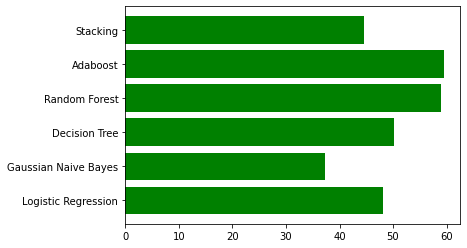

In [137]:
plt.barh(y=f1_df.Models,width=f1_df.F1_Score,color='green')

<BarContainer object of 6 artists>

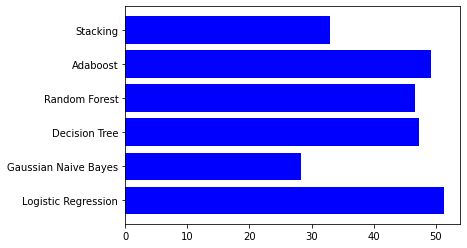

In [138]:
plt.barh(y=f1_df.Models,width=f1_df.Recall_Scores,color='blue')

In [139]:
f1_df

,Models,F1_Score,Recall_Scores
0,Logistic Regression,48.12,51.37
1,Gaussian Naive Bayes,37.29,28.25
2,Decision Tree,50.26,47.30
3,Random Forest,58.88,46.64
4,Adaboost,59.55,49.26
5,Stacking,44.62,32.90


In [140]:
# Analysis of True Predictions



In [141]:
new_bank_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [142]:
X3=new_bank_data.drop('Exited',1)
Y3=new_bank_data['Exited']

x2_train,x2_test,y2_train,y2_test=train_test_split(X3,Y3,test_size=0.3,random_state=42)

In [143]:
x2_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37
4684,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30
1731,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31
4742,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74
4521,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...,...,...
8014,15644295,Hargreaves,731,Spain,Female,39,2,126816.18,1,1,1,74850.93
1074,15682618,Jamieson,535,France,Female,31,7,111855.04,2,1,1,36278.89
3063,15578738,Tuan,609,France,Male,32,7,71872.19,1,1,1,151924.90
6487,15574283,Padovano,580,France,Male,31,2,0.00,2,0,1,64014.24


In [144]:
#Probabilities of customer leaving the bank

prob_df=pd.DataFrame(zip(x2_test['CustomerId'],x2_test['Surname'],y_prob),columns=['CustomerId','Surname','Probability Of Churn(%)'])
prob_df['Probability Of Churn(%)']=round(prob_df['Probability Of Churn(%)']*100,2)

In [145]:
prob_df.head(10)

,CustomerId,Surname,Probability Of Churn(%)
0,15687492,Anderson,23.53
1,15736963,Herring,7.89
2,15721730,Amechi,30.14
3,15762134,Liang,42.51
4,15648898,Chuang,6.54
5,15659064,Salas,5.39
6,15761986,Obialo,22.19
7,15713354,Morrice,21.08
8,15593454,Lambert,31.36
9,15690134,Hughes,26.31
